In [ ]:
![Aviation Crash Statistics](./Aviation%20Statistsics.jpeg)

# Navigating Aviation Risks for Business Expansion

**Authors:** Kigen Tuwei
***

## Overview

***
In this project, we analyze aviation accident data to help a company decide which aircraft types are the safest for their new aviation business. The dataset, sourced from the National Transportation Safety Board, contains civil aviation accident records from 1962 to 2023 [Aviation Data](./AviationData.csv). We also have US_State data with abbreviations [US State Codes](./USState_Codes.csv). 

Using **data cleaning, imputation, exploratory analysis, and visualization**, we identify key risk factors associated with different aircraft models, flight purposes, weather conditions, and accident phases. Our findings provide **three actionable business recommendations** to guide the company in selecting low-risk aircraft.  
***

## Business Problem

***
As part of its diversification strategy, our company plans to enter the aviation industry by purchasing and operating aircraft for commercial and private use. However, a major concern is **understanding the risks associated with different aircraft types** before making investment decisions.  

To address this, we aim to answer the following key questions: 

1. **Which aircraft models have the lowest accident rates?**  
2. **How does flight purpose affect accident risk?**  
3. **What role do weather conditions play in aviation accidents?**  
4. **Which phases of flight (takeoff, landing, cruise) are the riskiest?**
***

## Data Understanding

***
In this project, we use aviation accident data [AviationData.csv](./AviationData.csv) from the **National Transportation Safety Board (NTSB)**, which contains records of civil aviation accidents from **1962 to 2023**. The dataset provides insights into **aircraft types, accident causes, weather conditions, and flight phases** all crucial for assessing aviation risks. We also have state code data [USState_Codes.csv](./USState_Codes.csv) for location mapping 
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load datasets
aviation_df = pd.read_csv("AviationData.csv", encoding = "latin1", low_memory = False)
state_codes_df = pd.read_csv("USState_Codes.csv", encoding = "latin1", low_memory = False)

# Display the first 5 rows
aviation_df.head()

# We notice quite a few null values(NaN)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Check the Structure of the DataFrame

1. Provides number of rows and columns.
2. Helps identify data types and potential inconsistencies.
3. Reveals missing values.

**using 'aviation_df.info()'**

In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Summary Statistics
 
1. To understand the distribution of numerical variables.
2. Shows the minimum and maximum values.
3. Highlights potential outliers.

**using 'aviation_df.describe()'**

In [5]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Check for Missing Values

1. Helps determine whether to drop, fill, or impute missing data based on relevance.

**using 'aviation_df.isnull().sum()'**

In [6]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Preparation

Below are some of the processes I'll be using to clean the data to ensure a higher degree of accuracy and to provide better insights:

***
1. **Handling Missing Values**: I'll be dropping columns with excessive nulls and replacing them using median (for numeric values) and mode (for categoric values).    
2. **Feature Engineering**: New variables such as "Injury Severity Score" and "Risk Level" will be created to better assess accident severity.  
3. **Merging Datasets**: The aviation dataset will be merged with the U.S. state codes dataset to provide location-based insights.  
***

### Handling Missing Values

1. I'll drop columns with too many missing values (> 40% missing)
2. I'll also fill missing numerical values with the median and missing categorical values with the mode.

In [7]:
# Dropping columns with too many missing values (more than 40% missing)
missing_threshold = 0.4 * len(aviation_df)  # 40% of total rows
aviation_df = aviation_df.dropna(thresh=missing_threshold, axis=1)


# Filling missing values in numerical columns with the median
num_cols = [col for col in aviation_df.columns if aviation_df[col].dtype in ['int64', 'float64']] # finding the numeric columns
for column in num_cols:
    aviation_df[column].fillna(aviation_df[column].median(), inplace=True) # filling missing values with median

# Filling missing values in categorical columns with the mode
cat_cols = [col for col in aviation_df.columns if aviation_df[col].dtype == 'object'] # finding categorical columns
for column in cat_cols:
    aviation_df[column].fillna(aviation_df[column].mode()[0], inplace=True) # filling the missing values with the mode in the first index [0]


### Feature Engineering

This involves creating two new columns;

1. 'Injury_Severity_Score' to measure accident severity
2. 'Risk_level' column based on severity

In [8]:
# Create an "Injury Severity Score" to measure accident severity
# By combining their weighted values
aviation_df["Injury_Severity_Score"] = (
    aviation_df["Total.Fatal.Injuries"].fillna(0) * 3 +  # Fatal injuries are the most severe with a weight of 3
    aviation_df["Total.Serious.Injuries"].fillna(0) * 2 +  # Serious injuries are given medium weight of 2
    aviation_df["Total.Minor.Injuries"].fillna(0) * 1  # Minor injuries are the least severe with a weight of 1
)

# Create a "Risk Level" column based on severity; High Risk, Medium Risk and Low Risk
def categorize_risk(score):
    if score >= 10:
        return "High Risk"
    elif score >= 5:
        return "Medium Risk"
    else:
        return "Low Risk"

aviation_df["Risk_Level"] = aviation_df["Injury_Severity_Score"].apply(categorize_risk)

aviation_df[["Injury_Severity_Score", "Risk_Level"]].head(15) # to display accuracy of changes

,Injury_Severity_Score,Risk_Level
0,6.0,Medium Risk
1,12.0,High Risk
2,9.0,Medium Risk
3,6.0,Medium Risk
4,7.0,Medium Risk
5,1.0,Low Risk
6,12.0,High Risk
7,0.0,Low Risk
8,0.0,Low Risk
9,3.0,Low Risk


### Merging Datasets

1. To improve location-based analysis, we will merge `aviation_df` with `state_codes_df` on the state column.

In [9]:
print(aviation_df.columns)
print(state_codes_df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Injury_Severity_Score', 'Risk_Level'],
      dtype='object')
Index(['US_State', 'Abbreviation'], dtype='object')


In [17]:
# Merging Datasets
# Rename "Location" column to "State" for consistency
aviation_df.rename(columns={"Location": "State"}, inplace=True)

# Merge aviation dataset with state codes dataset
aviation_df = aviation_df.merge(state_codes_df, how="left", on="State")

# Display the first few rows to check changes
aviation_df.head(13)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,State,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Injury_Severity_Score,Risk_Level,Year,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NONE,Private,Fatal(2),Destroyed,...,0.0,0.0,UNK,Cruise,Probable Cause,25-09-2020,6.0,Medium Risk,1948,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NONE,Private,Fatal(4),Destroyed,...,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,12.0,High Risk,1962,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NONE,Private,Fatal(3),Destroyed,...,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007,9.0,Medium Risk,1974,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NONE,Private,Fatal(2),Destroyed,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6.0,Medium Risk,1977,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NONE,Private,Fatal(1),Destroyed,...,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,7.0,Medium Risk,1979,NaN
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,NONE,Private,Non-Fatal,Substantial,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1.0,Low Risk,1979,NaN
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NONE,Private,Fatal(4),Destroyed,...,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,12.0,High Risk,1981,NaN
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NONE,BLACKBURN AG STRIP,Non-Fatal,Substantial,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.0,Low Risk,1982,NaN
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.0,Low Risk,1982,NaN
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,...,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,3.0,Low Risk,1982,NaN


In [ ]:
# Save the cleaned dataset to a new CSV file
aviation_df.to_csv("cleaned_aviation_data.csv")

## Data Modeling

I applied a structured approach to analyzing aviation accident data, ensuring insights are relevant to accident risk factors. I used a **bar chart**, **box plot**, **scatter plot** and **line chart** to help visualize and model the data

***
1. A **bar chart** was used to compare the aircraft model to accident rate so as to inform on the safer models.
2. A **box plot** was used to illustrate the distribution of accident severity across different flight purposes, revealing which types of flights tend to have more severe incidents.  
3. A **scatter plot** was used to explore the relationship between weather conditions and accident severity, providing insights into how hazardous weather impacts aviation safety. 
4. A **line chart** was used to track accident trends over time for different flight phases, showing changes in aviation safety across years.  
***

### Aircraft Models and Accident Rates

- I calculated the accident rates per aircraft model by **normalizing accident counts**.  
- A **bar chart** was used to identify the models with the **lowest accident rates**, therefore helping the new head of aviation understand which aircraft types are historically safer.  

The models at the **top of the chart** (dark blue bars) have the **lowest accident rates** among the analyzed aircraft.These models could be considered **safer choices**.

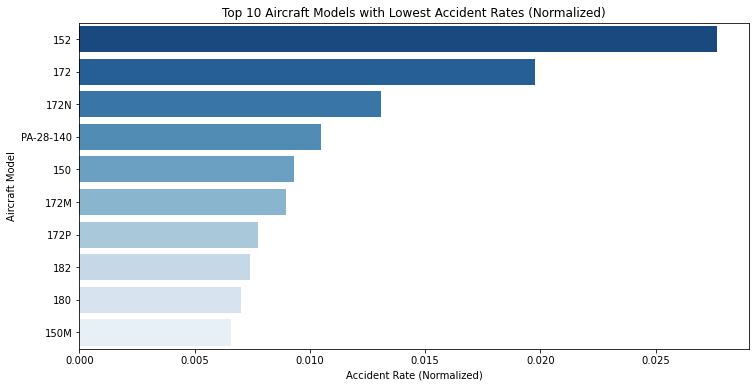

In [15]:
# Count total accidents per aircraft model
model_accident_counts = aviation_df['Model'].value_counts()

# Normalize by the total number of aircraft models present in the dataset to get a relative proportion
model_accident_rates = model_accident_counts / model_accident_counts.sum()

# Convert to DataFrame for plotting
model_accident_rates = model_accident_rates.head(10).reset_index()
model_accident_rates.columns = ['Model', 'Accident Rate']

# Plot refined bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Accident Rate', y='Model', data=model_accident_rates, palette='Blues_r')
plt.xlabel("Accident Rate (Normalized)")
plt.ylabel("Aircraft Model")
plt.title("Top 10 Aircraft Models with Lowest Accident Rates (Normalized)")
plt.savefig("aircraft_accident_rates.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Flight Purpose and Schedule Impact on Accident Risk

- I visualized the relationship between **flight purpose (e.g., commercial, private, military)** and accident severity.I used a **box plot** to illustrate the distribution of accident severity across different flight purposes, revealing which types of flights tend to have more severe incidents.  

It is clear Aerial Survey and Photo(ASHO), Skydiving, Firefighting and Air Race Show are high on severity and therefore should be avoided.

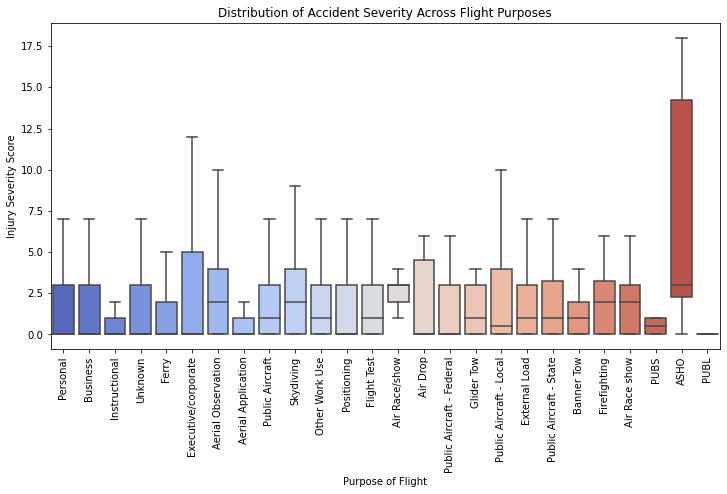

In [14]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='Purpose.of.flight', y='Injury_Severity_Score', data=aviation_df, palette='coolwarm', showfliers=False)


# Label the axes and title
plt.xlabel("Purpose of Flight")
plt.ylabel("Injury Severity Score")
plt.title("Distribution of Accident Severity Across Flight Purposes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot
plt.savefig("flight_purpose_accident_severity.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Weather Conditions and Aviation Accidents

- I examined how **weather conditions** (e.g., clear, fog, storm) correlate with accident frequencies.
- A **scatter plot** explored the relationship between weather conditions and accident severity, providing insights into how hazardous weather impacts aviation safety.  

The green dots 'Instrument Meteorological Conditions(IMC)' show a wider spread of severity values, suggesting that accidents in IMC tend to have more severe consequences.

The blue dots 'Visual Meteorological Conditions(VMC)' are mostly clustered at the lower severity levels, meaning accidents in clear weather tend to be less severe.

The orange dots 'Unknown Conditions(UNK)' appear spread out but not as severe as IMC.

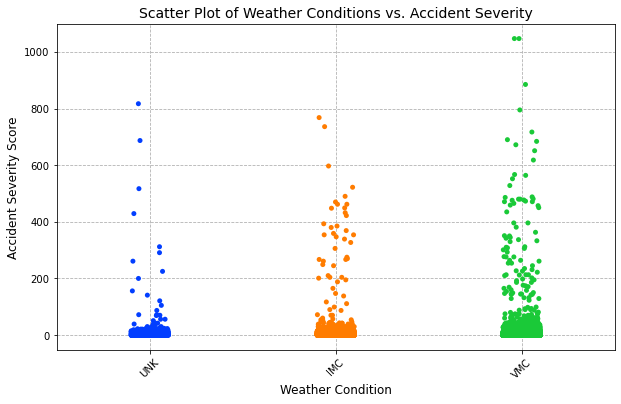

In [13]:
aviation_df["Weather.Condition"] = aviation_df["Weather.Condition"].str.strip().str.upper() # To remove UNK appearing as both upper and lower case in the scatter-plot

plt.figure(figsize=(10, 6))
    
# Create scatter plot
sns.stripplot(x='Weather.Condition', y='Injury_Severity_Score', data=aviation_df, jitter=True, palette="bright")

# Customize plot by labeling the axes and title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Accident Severity Score", fontsize=12)
plt.title("Scatter Plot of Weather Conditions vs. Accident Severity", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')

# Save the figure
plt.savefig("scatter_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Riskiest Phases of Flight

- I analyzed accident occurrences during **takeoff, cruise, and landing** to determine the riskiest flight phases.
- A **line chart** tracked accident trends over time for different flight phases, showing changes in aviation safety across years.  

The 'orange line (Landing)' shows consistently higher accident counts compared to 'Takeoff (green)' and 'Cruise (blue)'.

The 'green line (Takeoff)' follows a similar downward trend as Landing, but with a lower accident count overall.

There has been a spike in landing accidents post-2010.


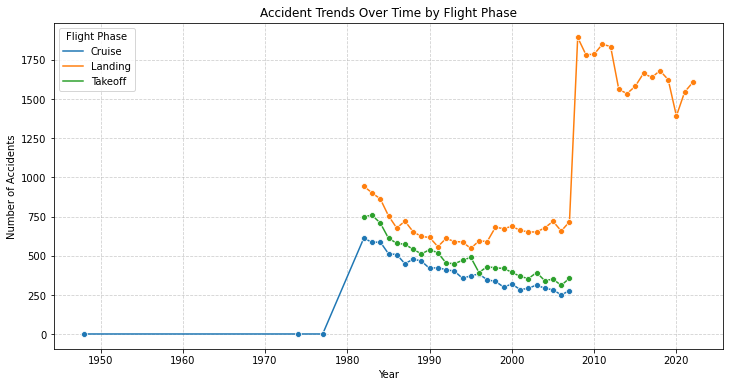

In [11]:
# Convert Event.Date to datetime format
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce')

# Extract the year from the Event.Date column
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

# Filter data for relevant flight phases
flight_phases = ['Takeoff', 'Cruise', 'Landing']
filtered_df = aviation_df[aviation_df['Broad.phase.of.flight'].isin(flight_phases)]

# Count accidents per year for each flight phase
accident_trends = filtered_df.groupby(['Year', 'Broad.phase.of.flight']).size().reset_index(name='Accident Count')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Accident Count', hue='Broad.phase.of.flight', data=accident_trends, marker='o')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accident Trends Over Time by Flight Phase")
plt.legend(title="Flight Phase")
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig("flight_phase_trends.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Evaluation

Based on our earlier objectives we've been able to narrow down the risk averse areas and risk prone areas.

***
This analysis leads to three recommendations for the Head of Aviation:

1. The most accident prone **flight phases are takeoff and landing**. I would therefore advise the Head of Aviation to **invest in training and/or acquiring skilled pilot, so as to, to reduce the probability of takeoff/landing accidents**. Also, **I would urge him/her to invest in airport structure improvements and maintenance** to reduce risk of takeoff/landing accidents.

2. It seems accidents in **Instrument Meteorological Conditions (IMC) tend to be more severe**. Therefore, I would recommend enhancing pilot training for IMC scenarios. Secondly, I would recommend improving the data collection on **Unknown Conditions (UNK)** herreby, increasing our ability to analyze risk.

3. I would recommend investing in aircraft models with the lowest accident rates, such as; **152,172,172N and PA-28-140** and avoiding those with high accident rates, such as; **150M, 180, 182, 172P**.

***

## Conclusions

The analysis of **aviation accident trends** across various factors; weather conditions, flight phase, accident rates, and flight purpose has provided valuable insights for improving aviation safety. Key findings include:  

- **Weather Conditions:** Accidents in **IMC (Instrument Meteorological Conditions)** are more severe, suggesting the need for enhanced pilot training and improved onboard safety systems.  

- **Flight Phase Trends:** A significant portion of accidents occur during **takeoff and landing**, highlighting the importance of procedural improvements and pilot alertness in these phases.  

- **Accident Rates Over Time:** While accident rates may have declined, fluctuations indicate ongoing risks, necessitating continued monitoring and proactive safety measures.  

- **Flight Purpose & Severity:** General aviation flights tend to have higher accident severity than commercial flights, emphasizing the need for stricter regulations and improved training for private pilots.  

### Limitations of The Analysis

**Data Completeness:** Some accidents were classified under "Unknown Conditions" (UNK), reducing clarity in certain risk assessments.  

### Next Steps

**Expand the Dataset:** Incorporate more variables, such as **aircraft type, pilot experience, and maintenance records**, to refine accident analysis.  
 **Regulatory Impact Assessment:** Evaluate how past **aviation regulations and technological advancements** have influenced safety trends.  


In [1]:
!jt -r


Reset css and font defaults in:
C:\Users\kigen\.jupyter\custom &
C:\Users\kigen\AppData\Roaming\jupyter\nbextensions


In [2]:
jupyter nbconvert --to markdown your_notebook.ipynb
mv your_notebook.md README.md

SyntaxError: invalid syntax (<ipython-input-2-fbea8c09eb08>, line 1)